## Example from yhat here:http://blog.yhat.com/posts/logistic-regression-and-python.html

In [4]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy as sp

# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from StringIO import StringIO

#now import data from web address:https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
url = "https://stats.idre.ucla.edu/stat/data/binary.csv"

# read the data in
source= requests.get(url).text
data=StringIO(source) 
df=pd.read_csv(data,header =0)

In [5]:
print df.head()

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [6]:
df.columns = ["admit", "gre", "gpa", "prestige"]
print df.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


In [7]:
#summarise the data
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [8]:
print df.std()

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64


In [9]:
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])  #using crosstab function rather than pivot table

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


In [11]:
#try crosstab with gpa
print pd.crosstab(df['admit'],df['gpa'], rownames=['admit'])

gpa    2.26  2.42  2.48  2.52  2.55  2.56  2.62  2.63  2.65  2.67  ...   3.90  \
admit                                                              ...          
0         1     1     1     1     1     1     1     1     0     1  ...      2   
1         0     1     0     0     0     0     1     0     1     1  ...      1   

gpa    3.91  3.92  3.93  3.94  3.95  3.97  3.98  3.99  4.00  
admit                                                        
0         1     2     1     4     1     1     0     2    15  
1         0     0     0     1     4     0     1     1    13  

[2 rows x 132 columns]


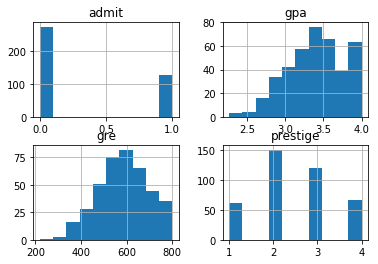

In [12]:
df.hist()
pl.show()

In [13]:
# dummify rank (prestige)
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1  prestige_2  prestige_3  prestige_4
0           0           0           1           0
1           0           0           1           0
2           1           0           0           0
3           0           0           0           1
4           0           0           0           1


In [14]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
print data.head()

   admit  gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380  3.61           0           1           0
1      1  660  3.67           0           1           0
2      1  800  4.00           0           0           0
3      1  640  3.19           0           0           1
4      0  520  2.93           0           0           1


In [15]:
# manually add the intercept
data['intercept'] = 1.0

In [16]:
print data.head()

   admit  gre   gpa  prestige_2  prestige_3  prestige_4  intercept
0      0  380  3.61           0           1           0        1.0
1      1  660  3.67           0           1           0        1.0
2      1  800  4.00           0           0           0        1.0
3      1  640  3.19           0           0           1        1.0
4      0  520  2.93           0           0           1        1.0


In [17]:
train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

In [18]:
logit = sm.Logit(data['admit'], data[train_cols])

In [19]:
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [20]:
# cool enough to deserve it's own gist
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Aug 2017   Pseudo R-squ.:                 0.08292
Time:                        18:13:15   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_2    -0.6754      0.316     -2.134      0.0

In [21]:
# look at the confidence interval of each coeffecient
print result.conf_int()

                   0         1
gre         0.000120  0.004409
gpa         0.153684  1.454391
prestige_2 -1.295751 -0.055135
prestige_3 -2.016992 -0.663416
prestige_4 -2.370399 -0.732529
intercept  -6.224242 -1.755716


In [22]:
# odds ratios only
print np.exp(result.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64


In [23]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                2.5%     97.5%        OR
gre         1.000120  1.004418  1.002267
gpa         1.166122  4.281877  2.234545
prestige_2  0.273692  0.946358  0.508931
prestige_3  0.133055  0.515089  0.261792
prestige_4  0.093443  0.480692  0.211938
intercept   0.001981  0.172783  0.018500


In [27]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]


In [28]:
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas

[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [30]:
#catresian function here, user defined from 
# https://stackoverflow.com/questions/1208118/using-numpy-to-build-an-array-of-all-combinations-of-two-arrays
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [33]:
# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])

# make predictions on the enumerated dataset
combos['admit_pred'] = result.predict(combos[train_cols])

In [34]:
print combos.head()

     gre       gpa  prestige  intercept  prestige_2  prestige_3  prestige_4  \
0  220.0  2.260000       1.0        1.0           0           0           0   
1  220.0  2.260000       2.0        1.0           1           0           0   
2  220.0  2.260000       3.0        1.0           0           1           0   
3  220.0  2.260000       4.0        1.0           0           0           1   
4  220.0  2.453333       1.0        1.0           0           0           0   

   admit_pred  
0    0.157801  
1    0.087056  
2    0.046758  
3    0.038194  
4    0.179574  


In [40]:
# helper function to isolate values to plot
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    # in case you're curious as to what this looks like
    # print grouped.head()
    #                      admit_pred
    # gre        prestige            
    # 220.000000 1           0.282462
    #            2           0.169987
    #            3           0.096544
    #            4           0.079859
    # 284.444444 1           0.311718
    
    # make a plot
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.iloc[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()

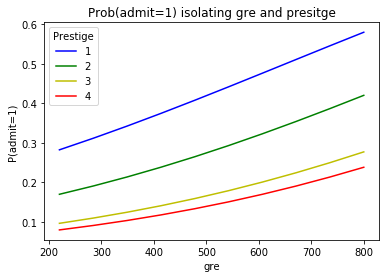

In [41]:
isolate_and_plot('gre')

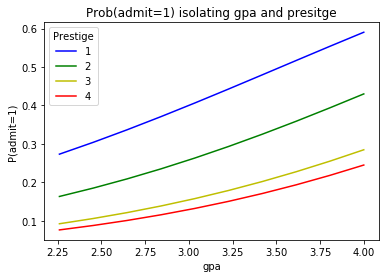

In [43]:
isolate_and_plot('gpa')